In [1]:
import numpy as np
from numpy import linalg as LA
# https://numpy.org/doc/stable/reference/routines.linalg.html
# from statistics import 
# https://numpy.org/doc/stable/reference/routines.statistics.html


import scipy
from scipy import linalg
# https://docs.scipy.org/doc/scipy/reference/linalg.html
from scipy import stats
# https://docs.scipy.org/doc/scipy/reference/stats.html

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
print(a)
print(b)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]


In [4]:
v1 = np.array([[1],[2]])
v2 = np.array([[5],[6]])
print(np.dot(v1,v2.T))


[[ 5  6]
 [10 12]]


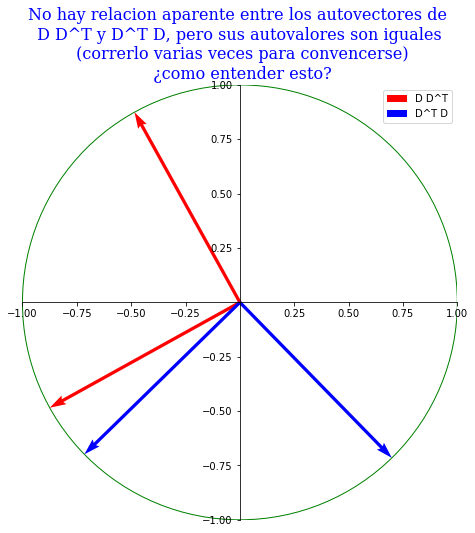

autovalores de D D^T =  [0.25536126 4.94782212]
autovalores de D^T D =  [0.25536126 4.94782212]
autovalores de D     =  [ 0.85696122 -1.31166634]
autovalores de D al 2=  [0.73438254 1.7204686 ]


In [5]:
# matriz D generada al azar
# autovectores y autovalores de
# las matrices D D^T y D^T D


D = np.random.randn(2,2)
DDT = np.dot(D,D.T)
DTD = np.dot(D.T,D)

wD,vD = LA.eig(D)

wDDT,vDDT = LA.eigh(DDT)
wDTD,vDTD = LA.eigh(DTD)

# plot los autovectores de DDT y DTD

origin = [[0, 0], [0, 0]] # origin point

fig, ax = plt.subplots(figsize=(8,8))

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

l = 1.0
ax.set_xticks([-1*l,-0.75*l,-0.5*l, -0.25*l, 0.25*l, 0.5*l, 0.75*l, 1*l])
ax.set_yticks([-1*l,-0.75*l,-0.5*l, -0.25*l, 0.25*l, 0.5*l, 0.75*l, 1*l])


ax.set_title("No hay relacion aparente entre los autovectores de \n D D^T y D^T D, pero sus autovalores son iguales \n (correrlo varias veces para convencerse)\n ¿como entender esto?",
             fontsize=16, fontname='serif', color="blue")

plt.xlim(-l, l)
plt.ylim(-l, l)
plt.gca().set_aspect('equal', adjustable='box')

ax.quiver(*origin, vDDT.T[:,0], vDDT.T[:,1], color=['r','r'], scale=2, label="D D^T")
ax.quiver(*origin, vDTD.T[:,0], vDTD.T[:,1], color=['b','b'], scale=2, label="D^T D")

circle = plt.Circle((0, 0), 1.0, color='g', fill=False)
ax.add_artist(circle)

ax.legend()
plt.show()
# fig.savefig("f10.png")

print("autovalores de D D^T = ", wDDT)
print("autovalores de D^T D = ", wDTD)
print("autovalores de D     = ", wD)
print("autovalores de D al 2= ", wD**2)

In [7]:
# comprobacion de que los autovectores v
# de D^T D (filas de vDTD) son proporcionales
# a D^T w, donde w es un autovector de DDT
# (los w son las filas de vDDT)
# aunque A normaliza a los vectores fila de
# D^T vDDT, todavia queda una arbitrariedad
# de signo.

wDDT,vDDT = LA.eigh(DDT)
wDTD,vDTD = LA.eigh(DTD)

A = np.dot(D.T,vDDT)
B = A**2
C = np.sum(B,axis = 0)
A /= np.sqrt(C)

print("vDTD = \n", vDTD)
print("A = \n", A)

vDTD = 
 [[-0.55949295 -0.82883511]
 [-0.82883511  0.55949295]]
A = 
 [[-0.55949295  0.82883511]
 [-0.82883511 -0.55949295]]


In [6]:
# comprobacion de SVD
# D  = sum_{i} sqrt(li) wi vi^T
# (o alguna de las 4 alternativas lo es)

wDDT,vDDT = LA.eigh(DDT)
wDTD,vDTD = LA.eigh(DTD)

v0 = vDTD[:,0].reshape(2,1)
l0 = wDTD[0]
v1 = vDTD[:,1].reshape(2,1)
l1 = wDTD[1]

w0 = vDDT[:,0].reshape(2,1)
w1 = vDDT[:,1].reshape(2,1)

srl0 = np.sqrt(l0)
srl1 = np.sqrt(l1)

D1 = srl0*np.dot(w0,v0.T) + srl1*np.dot(w1,v1.T)
D2 = srl0*np.dot(w0,v0.T) - srl1*np.dot(w1,v1.T)
D3 = - srl0*np.dot(w0,v0.T) + srl1*np.dot(w1,v1.T)
D4 = - srl0*np.dot(w0,v0.T) - srl1*np.dot(w1,v1.T)

print("[l0, l1] = ", wDTD)
print("D = \n", D)
print("D1 = \n", D1)
print("D2 = \n", D2)
print("D3 = \n", D3)
print("D4 = \n", D4)

[l0, l1] =  [0.01909056 5.41935047]
D = 
 [[-1.58752522 -1.31782705]
 [ 0.92729552  0.5671504 ]]
D1 = 
 [[ 1.58752522  1.31782705]
 [-0.92729552 -0.5671504 ]]
D2 = 
 [[-1.66631047 -1.2166815 ]
 [ 0.77686724  0.76027222]]
D3 = 
 [[ 1.66631047  1.2166815 ]
 [-0.77686724 -0.76027222]]
D4 = 
 [[-1.58752522 -1.31782705]
 [ 0.92729552  0.5671504 ]]


In [7]:
# cociente de raiz cuadrada de autovalores de D^T D
# este cociente marca el orden de magnitud del
# error de la apriximacion SVD con el primer termino
# (medida de las cifras significativas)
print(srl0/srl1)

0.05935204940927522


In [8]:
# aproximacion SVD de D
# (el signo puede fallar)
SVDaprox = srl1*np.dot(w1,v1.T)
print("D = \n",D)
print("SVDaprox = \n", SVDaprox)
print("sqrt(l0/l1) = ", np.sqrt(l0/l1))
print("orden de magn del error SVD: sqrt(l0/l1) = ", np.sqrt(l0/l1))
print("SVDaprox/D = \n", SVDaprox/D)

D = 
 [[-1.58752522 -1.31782705]
 [ 0.92729552  0.5671504 ]]
SVDaprox = 
 [[ 1.62691784  1.26725428]
 [-0.85208138 -0.66371131]]
sqrt(l0/l1) =  0.05935204940927522
orden de magn del error SVD: sqrt(l0/l1) =  0.05935204940927522
SVDaprox/D = 
 [[-1.02481386 -0.96162412]
 [-0.91888871 -1.17025626]]


In [9]:
# aproximacion PCA de D^T D
print("D^T D = \n", DTD)
PCAaprox = l1*np.dot(v1,v1.T) 
print("PCAaprox = \n", PCAaprox) 
print("orden de magn del error pCA: l0/l1 = ", l0/l1)
print("PCAaprox/(D^T D) = \n", PCAaprox/DTD)

D^T D = 
 [[3.3801133  2.61799971]
 [2.61799971 2.05832773]]
PCAaprox = 
 [[3.37290436 2.62725465]
 [2.62725465 2.04644611]]
orden de magn del error pCA: l0/l1 =  0.0035226657690810475
PCAaprox/(D^T D) = 
 [[0.99786725 1.00353512]
 [1.00353512 0.99422754]]


In [10]:
# la funcion svd

W, s, VT = LA.svd(D, full_matrices=False)
print(s)
S = np.diag(s)
print("V^T = \n", VT)
print("S = \n", S)
print("W = \n", W)
print("D = W S v^T = \n", np.dot(W,np.dot(S,VT)))

[2.32794984 0.13816859]
V^T = 
 [[ 0.7889117   0.61450658]
 [ 0.61450658 -0.7889117 ]]
S = 
 [[2.32794984 0.        ]
 [0.         0.13816859]]
W = 
 [[-0.88585698  0.46395842]
 [ 0.46395842  0.88585698]]
D = W S v^T = 
 [[-1.58752522 -1.31782705]
 [ 0.92729552  0.5671504 ]]
